In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

# Research Question:
_________________________________________
_________________________________________

# Data Dictionary: 
age - age of patient in years                                                                                                                                 
sex - 1 = male, 0 = female                                                                                                                                    
cp - chest pain type: 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic                                                             
trestbps - resting blood pressure in mmHg                                                                                                                     
chol - serum cholesterol in mg/dL                                                                                                                             
fbs - fasting blood sugar > 120. 1 = true, 0 = false                                                                                                          
restecg - electrocardiogram results: 0:Normal, 1:ST-T wave abnormality, 2:left ventricular hypertrophy                                                        
thalach - greatest heart rate achievable through strenuous exercise in bpm                                                                                    
exang - exercise induced angina - 1: yes, 2: no                                                                                                               
oldpeak - ST depression induced by exercise relative to rest in mm                                                                                            
slope - the slope of the peak exercise ST segment - 1: upsloping, 2: flat, 3: fownsloping                                                                     
ca - number of major vessels colored by fluoroscopy                                                                                                           
thal - thallium absorption - 0:Normal, 1:fixed defect, 2:reversible defect                                                                                    
heart_attack - 0:no heart attack, 1:heart attack

In [5]:
os.getcwd()

'C:\\Users\\taego\\Documents\\coding\\ds2001\\ds2001_spring22'

In [8]:
os.chdir('/Users/taego/Documents/coding/ds2001/ds2001_spring22/project')

In [22]:
df = pd.read_csv('Heart Attack Data Set.csv')
df = pd.DataFrame(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Cleaning: rename columns, remove outliers


In [23]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


(303, 14)

In [26]:
# rename columns
df2 = df.rename(columns = {'target':'heart_attack', 'trestbps':'rest_bp', 'thalach':'max_hr', 'restecg':'ecg', 'slope':'st_slope', 
                           'ca':'fluoro_vessels', 'oldpeak':'st_depression'})
df2.head()

,age,sex,cp,rest_bp,chol,fbs,ecg,max_hr,exang,st_depression,st_slope,fluoro_vessels,thal,heart_attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
#Check duplicate rows in data
duplicate_rows = df2[df2.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (1, 14)


In [29]:
# remove the duplicate row
df2 = df2.drop_duplicates()
duplicate_rows = df2[df2.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (0, 14)


In [31]:
#Looking for null values
print("Null values :: ")
print(df2.isnull() .sum())

Null values :: 
age               0
sex               0
cp                0
rest_bp           0
chol              0
fbs               0
ecg               0
max_hr            0
exang             0
st_depression     0
st_slope          0
fluoro_vessels    0
thal              0
heart_attack      0
dtype: int64


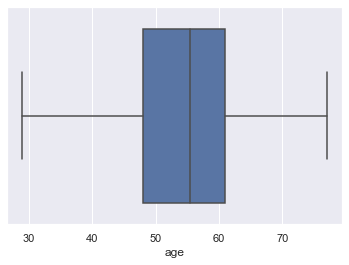

In [36]:
# 1. Detecting Outliers using IQR (InterQuartile Range)
sns.boxplot(x=df2['age'])

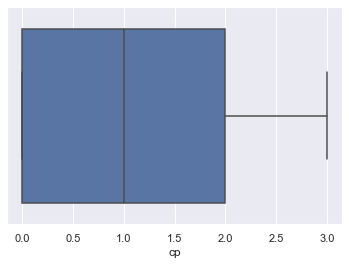

In [38]:
sns.boxplot(x=df2['cp'])

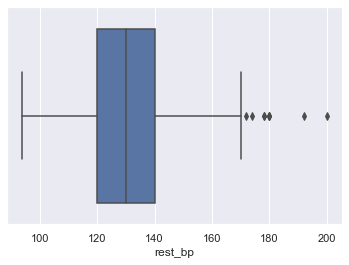

In [39]:
sns.boxplot(x=df2['rest_bp'])
# outliers spotted

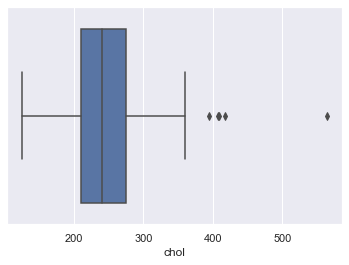

In [40]:
sns.boxplot(x=df2['chol'])
# outliers spotted

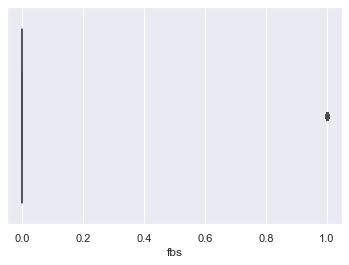

In [41]:
sns.boxplot(x=df2['fbs'])
# no outliers i think?

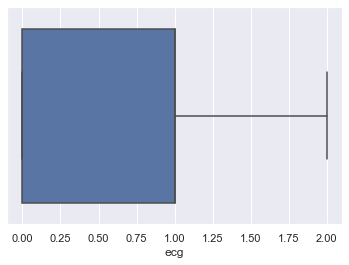

In [42]:
sns.boxplot(x=df2['ecg'])

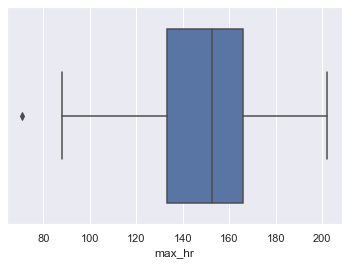

In [43]:
sns.boxplot(x=df2['max_hr'])
# some outliers

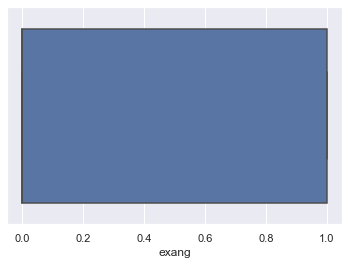

In [44]:
sns.boxplot(x=df2['exang'])

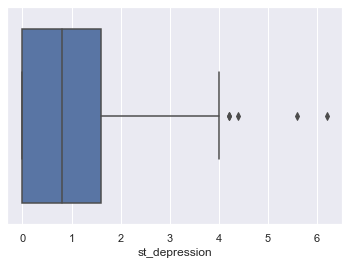

In [45]:
sns.boxplot(x=df2['st_depression'])
# some outliers

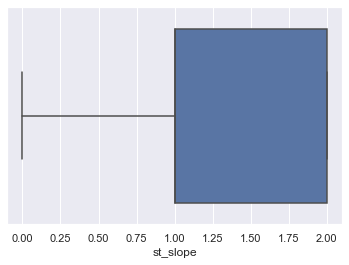

In [46]:
sns.boxplot(x=df2['st_slope'])

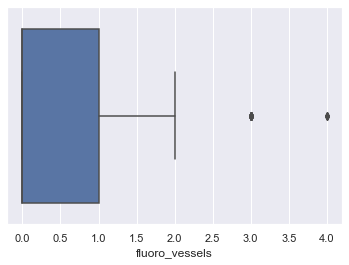

In [47]:
sns.boxplot(x=df2['fluoro_vessels'])
# outliers

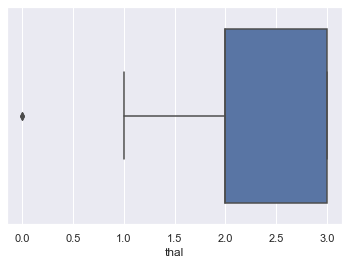

In [51]:
sns.boxplot(x=df2['thal']) 
# outliers

##### Outliers: thal, flouro-vessels, st-depression, max-hr,chol,rest_bp
Remove the outliers using Z-score (anything above Z-Score of +-3 is too much deviation)


In [59]:
#Removing outliers using Z-score
z = np.abs(stats.zscore(df2))
df3 = df2[(np.abs(stats.zscore(df2)) < 3).all(axis=1)]
df3.shape

(287, 14)

#### Pearson Correlation


Text(0.5, 1, 'Pearson Correlation')

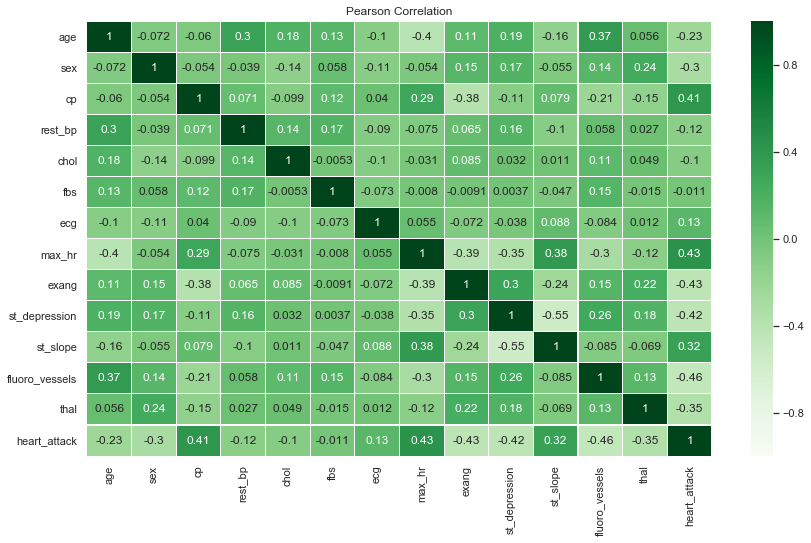

In [60]:
#Finding the correlation between variables
pearsonCorr = df3.corr(method='pearson')
spearmanCorr = df3.corr(method='spearman')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Greens", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

Pearson Correlation halved (since it is symmetric)

Text(0.5, 1, 'Pearson Correlation')

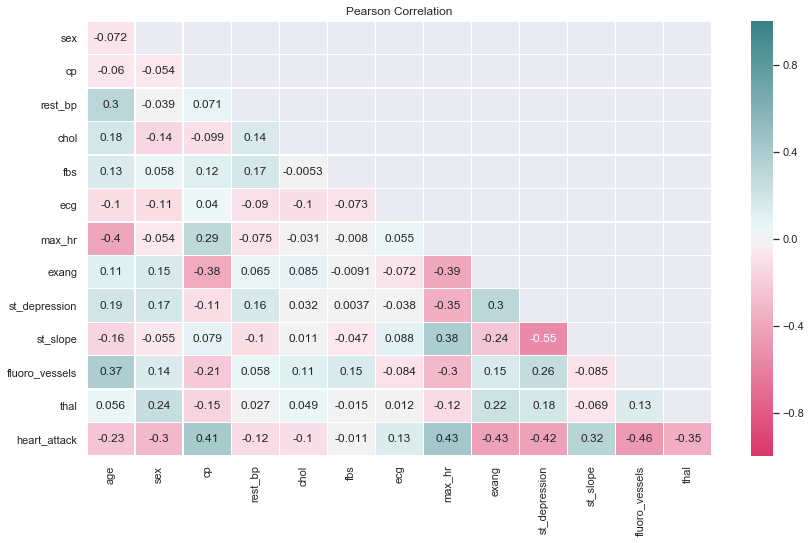

In [75]:
maskP = np.triu(np.ones_like(pearsonCorr,dtype=bool))
#Adjust mask and correlation
maskP = maskP[1:,:-1]
pCorr = pearsonCorr.iloc[1:,:-1].copy()
#Setting up a diverging palette
cmap = sns.diverging_palette(0, 200, 80, 50, as_cmap=True)
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pCorr, vmin=-1,vmax=1, cmap = cmap, annot=True, linewidth=0.3, mask=maskP)
plt.title("Pearson Correlation")

Spearman Correlation (Halved)

Text(0.5, 1, 'Spearman Correlation')

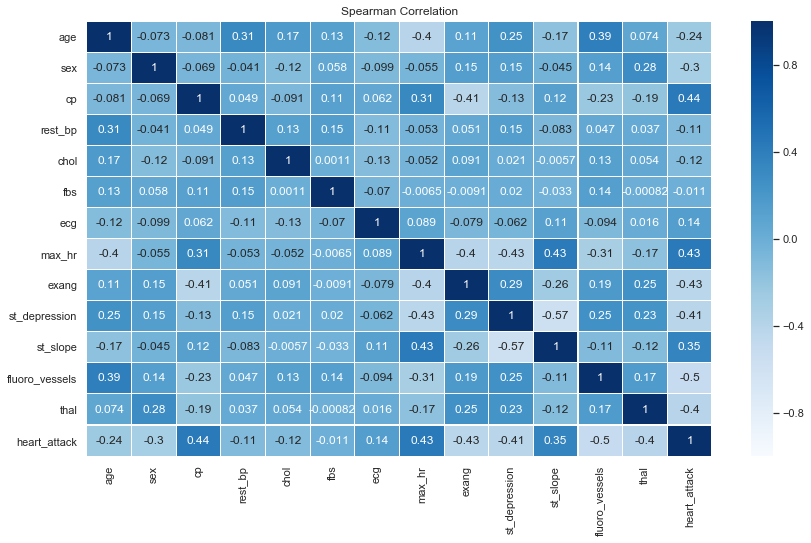

In [77]:
fig = plt.subplots(figsize=(14,8))
sns.heatmap(spearmanCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Spearman Correlation")

Text(0.5, 1, 'Spearman Correlation')

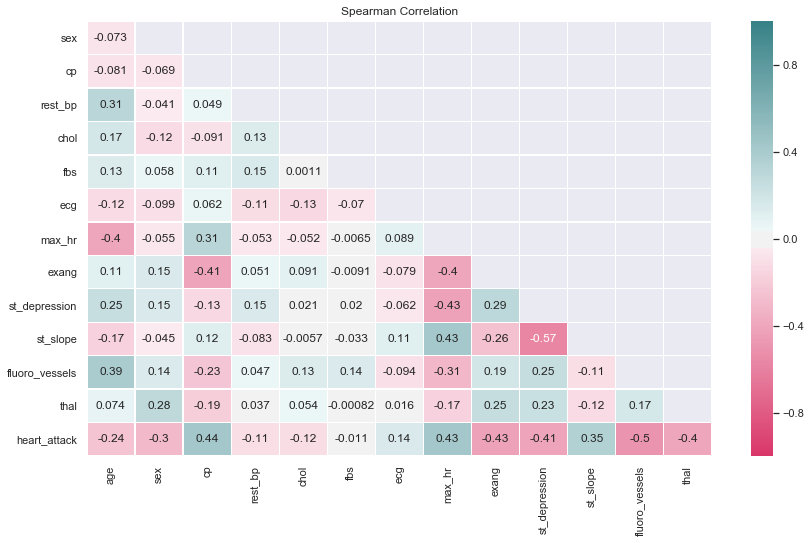

In [83]:
maskS = np.triu(np.ones_like(spearmanCorr,dtype=bool))
#Adjust mask and correlation
maskS = maskS[1:,:-1]
sCorr = spearmanCorr.iloc[1:,:-1].copy()
#Setting up a diverging palette
cmap = sns.diverging_palette(0, 200, 80, 50, as_cmap=True)
fig = plt.subplots(figsize=(14,8))
sns.heatmap(sCorr, vmin=-1,vmax=1, cmap = cmap, annot=True, linewidth=0.3, mask=maskS)
plt.title("Spearman Correlation")

### Logistic Regression Classifier 